### **Feature Engineering for Fraud Detection Predictive Model**

First, load necessary libraries

In [12]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load cleaned data
df = pd.read_csv('cleaned_data.csv')

# Load mcc data
json_file_path = "/Users/jiajue/Documents/McGill/Winter Term/INSY695/Group project/Fraud data/mcc_codes.json"
with open(json_file_path, "r") as file:
    mcc = json.load(file)

# Convert to df
mcc = pd.DataFrame.from_dict(mcc, orient='index').reset_index()
mcc['index'] = mcc['index'].astype(int)

# Merge df and mcc into single df
df = df.merge(mcc, left_on='mcc', right_on='index', how='left')
df = df.rename(columns={0: 'merchant information'})
df.drop(columns=['index'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914963 entries, 0 to 8914962
Data columns (total 40 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   id                           int64  
 1   date                         object 
 2   client_id                    int64  
 3   card_id                      int64  
 4   amount                       float64
 5   merchant_id                  int64  
 6   merchant_city                object 
 7   zip                          int64  
 8   mcc                          int64  
 9   Target                       int64  
 10  current_age                  int64  
 11  retirement_age               int64  
 12  birth_year                   int64  
 13  birth_month                  int64  
 14  address                      object 
 15  latitude                     float64
 16  longitude                    float64
 17  per_capita_income            float64
 18  yearly_income                float64
 19  

In [14]:
# Descriptive stats for each column
pd.set_option('display.max_columns', None)
df.describe()

,id,client_id,card_id,amount,merchant_id,zip,mcc,Target,current_age,retirement_age,birth_year,birth_month,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,transaction_hour,use_chip_Chip Transaction,use_chip_Online Transaction,use_chip_Swipe Transaction,merchant_state_CA,merchant_state_FL,merchant_state_IL,merchant_state_MI,merchant_state_NC,merchant_state_NY,merchant_state_OH,merchant_state_ONLINE,merchant_state_Other,merchant_state_PA,merchant_state_TX,gender_female,gender_male
count,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06,8.914963e+06
mean,1.558473e+07,1.026637e+03,3.474887e+03,3.165506e+00,4.772566e+04,5.696165e+04,5.565097e+03,1.495463e-03,5.402147e+01,6.648777e+01,1.965160e+03,6.567033e+00,3.737615e+01,-9.156999e+01,9.956725e+00,1.062341e+01,9.918007e+00,7.139262e+02,3.841198e+00,1.238931e+01,3.592585e-01,1.171037e-01,5.236378e-01,1.072754e-01,5.267549e-02,3.517592e-02,2.992104e-02,3.218600e-02,6.444457e-02,3.635439e-02,1.175400e-01,4.170598e-01,3.141202e-02,7.595533e-02,5.123041e-01,4.876959e-01
std,4.703991e+06,5.816755e+02,1.674427e+03,1.311322e+00,2.581623e+04,3.153351e+04,8.755078e+02,3.864230e-02,1.572477e+01,3.587085e+00,1.571386e+01,3.605192e+00,5.091677e+00,1.626130e+01,7.833352e-01,6.439853e-01,2.593639e+00,6.581489e+01,1.567701e+00,5.087697e+00,4.797831e-01,3.215438e-01,4.994410e-01,3.094631e-01,2.233848e-01,1.842243e-01,1.703695e-01,1.764938e-01,2.455432e-01,1.871704e-01,3.220627e-01,4.930730e-01,1.744285e-01,2.649266e-01,4.998486e-01,4.998486e-01
min,7.475327e+06,0.000000e+00,0.000000e+00,6.931472e-01,1.000000e+00,1.001000e+03,1.711000e+03,0.000000e+00,2.300000e+01,5.300000e+01,1.918000e+03,1.000000e+00,2.130000e+01,-1.581800e+02,6.931472e-01,6.931472e-01,6.931472e-01,4.880000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.150786e+07,5.190000e+02,2.413000e+03,2.295560e+00,2.588700e+04,3.010100e+04,5.300000e+03,0.000000e+00,4.200000e+01,6.500000e+01,1.956000e+03,3.000000e+00,3.389000e+01,-9.737000e+01,9.747652e+00,1.039873e+01,9.707351e+00,6.840000e+02,3.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.557140e+07,1.070000e+03,3.584000e+03,3.400864e+00,4.592600e+04,5.511600e+04,5.499000e+03,0.000000e+00,5.200000e+01,6.600000e+01,1.968000e+03,7.000000e+00,3.835000e+01,-8.647000e+01,9.959726e+00,1.062357e+01,1.085283e+01,7.160000e+02,4.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,1.965387e+07,1.530000e+03,4.899000e+03,4.169452e+00,6.757000e+04,9.066000e+04,5.812000e+03,0.000000e+00,6.300000e+01,6.800000e+01,1.977000e+03,1.000000e+01,4.112000e+01,-8.012000e+01,1.021497e+01,1.089700e+01,1.135230e+01,7.560000e+02,5.000000e+00,1.600000e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,2.376187e+07,1.998000e+03,6.138000e+03,5.758460e+00,1.003420e+05,9.992800e+04,9.402000e+03,1.000000e+00,1.010000e+02,7.900000e+01,1.996000e+03,1.200000e+01,4

### EDA Extension

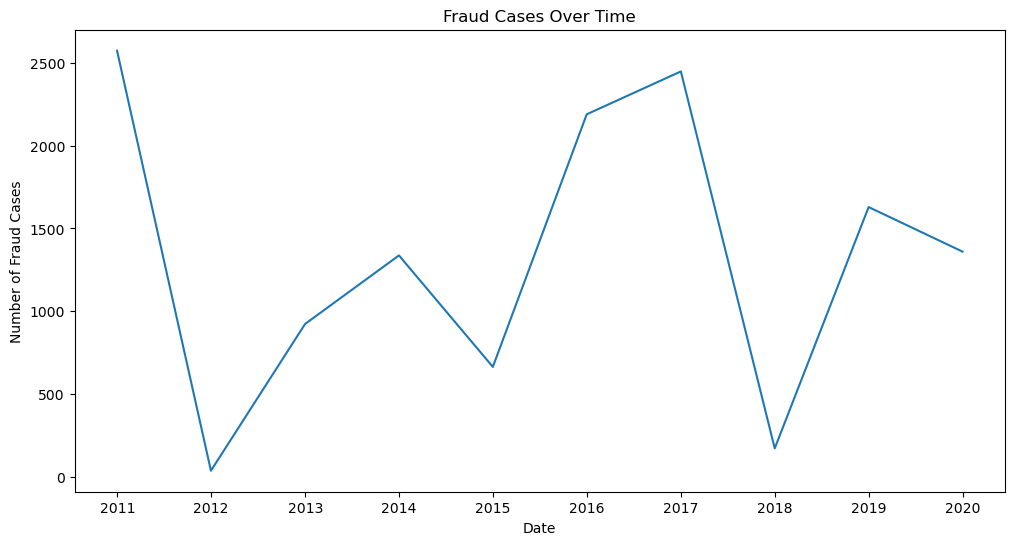

In [15]:
# Extract day of week data for each observation for subsequent individual purchase behaviour assessment
df['date'] = pd.to_datetime(df['date'])
df['transaction_day'] = df['date'].dt.dayofweek

# Group by date and count fraud
frauds_time = df.groupby(pd.Grouper(key='date', freq='Y'))['Target'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=frauds_time.index, y=frauds_time.values)
plt.title('Fraud Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fraud Cases')
plt.show()

# No value in keeping date as it is

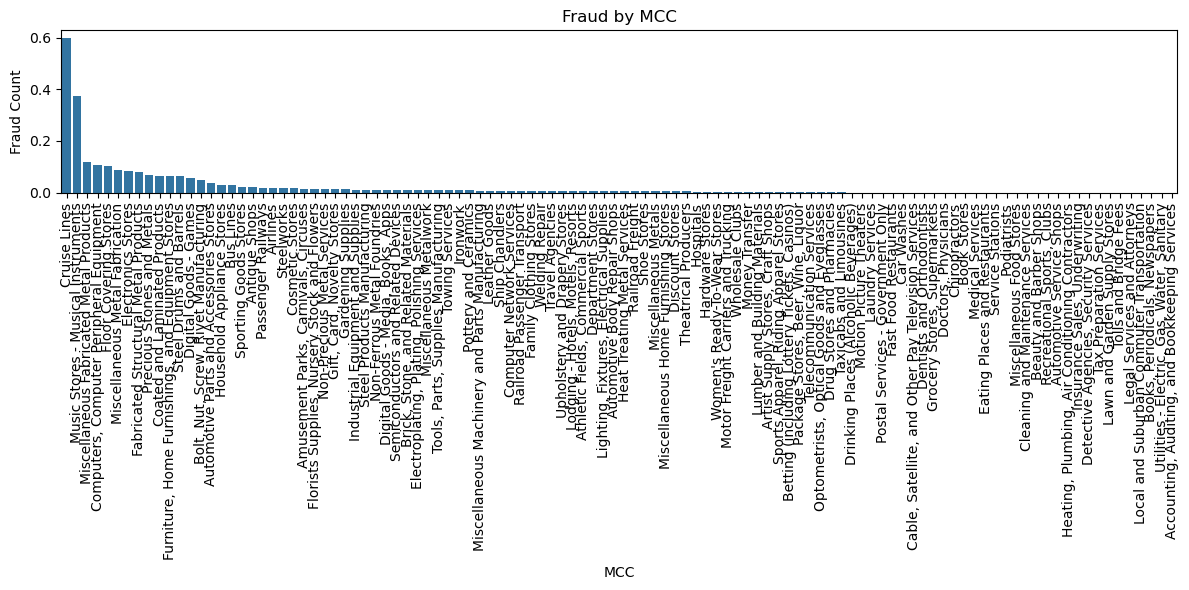

In [16]:
# Group by mcc and calculate overall fraud rate
fraud_mcc = df.groupby('merchant information')['Target'].mean().sort_values(ascending=False)

# Visualise fraud rate for each merchant
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_mcc.index, y=fraud_mcc.values)
plt.title('Fraud by MCC')
plt.xlabel('MCC')
plt.ylabel('Fraud Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
# Drop irrelevant columns
df = df.drop(df.columns[[0,3,5,8,12,13]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914963 entries, 0 to 8914962
Data columns (total 35 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   date                         datetime64[ns]
 1   client_id                    int64         
 2   amount                       float64       
 3   merchant_city                object        
 4   zip                          int64         
 5   Target                       int64         
 6   current_age                  int64         
 7   retirement_age               int64         
 8   address                      object        
 9   latitude                     float64       
 10  longitude                    float64       
 11  per_capita_income            float64       
 12  yearly_income                float64       
 13  total_debt                   float64       
 14  credit_score                 int64         
 15  num_credit_cards             int64         
 16  

#### **Feature engineering**

#### Engineer merchant risk score from merchant characteristics

In [ ]:
# Assign risk score to each merchant based on fraud rate and transaction amount instead of a binary col that indicates if the merchant is high risk or not to capture more information about each merch
def calculate_merchant_risk_score(df):
    """
    Calculates a continuous risk score for each merchant based on fraud rate, high-value transaction frequency, and transaction amount statistics.
    Returns: DataFrame with merchant information and risk scores.
    """
    transaction_types = ['Chip Transaction', 'Online Transaction', 'Swipe Transaction']
    merchant_risk_scores = []

    for t in transaction_types:
        # Split into respective transaction type
        df_type = df[df['use_chip_' + t] == 1]

        # Calculate fraud rate for each merchant
        fraud_mcc = df_type.groupby('merchant information')['Target'].mean().reset_index()
        fraud_mcc.rename(columns={'Target': 'fraud_rate'}, inplace=True)

        # Calculate quartiles for amounts per merchant
        mcc_quartiles = df_type.groupby('merchant information')['amount'].quantile([0.25, 0.75]).unstack()
        mcc_quartiles.columns = ['Q1', 'Q3']
        mcc_quartiles['IQR'] = mcc_quartiles['Q3'] - mcc_quartiles['Q1']
        mcc_quartiles['amount_threshold'] = mcc_quartiles['Q3'] + 1.5 * mcc_quartiles['IQR']  # upper whisker value

        # Count occurrence of high transaction amounts per merchant
        df_merged = pd.merge(df_type, mcc_quartiles, on='merchant information', how='left')
        df_merged['high_amount'] = (df_merged['amount'] >= df_merged['amount_threshold']).astype(int)
        high_amount_counts = df_merged.groupby('merchant information')['high_amount'].sum().reset_index()
        high_amount_counts.rename(columns={'high_amount': 'high_amount_count'}, inplace=True)

        # Calculate the ratio of high transaction amount relative to total transactions
        total_transaction_counts = df_type.groupby('merchant information').size().reset_index(name='total_transactions')
        mcc_ratios = pd.merge(high_amount_counts, total_transaction_counts, on='merchant information')
        mcc_ratios['high_amount_ratio'] = mcc_ratios['high_amount_count'] / mcc_ratios['total_transactions']

        # Calculate average transaction amount per merchant
        mcc_avg_amt = df_type.groupby('merchant information')['amount'].mean().reset_index()
        mcc_avg_amt.rename(columns={'amount': 'avg_transaction_amt'}, inplace=True)

        # Merge all merchant features
        merchant_risk = pd.merge(fraud_mcc, mcc_ratios, on='merchant information', how='left')
        merchant_risk = pd.merge(merchant_risk, mcc_avg_amt, on='merchant information', how='left')

        # Normalize avg_transaction_amt
        min_amt = merchant_risk['avg_transaction_amt'].min()
        max_amt = merchant_risk['avg_transaction_amt'].max()
        if max_amt > min_amt:
            merchant_risk['avg_transaction_amt_norm'] = (merchant_risk['avg_transaction_amt'] - min_amt) / (max_amt - min_amt)
        else:
            merchant_risk['avg_transaction_amt_norm'] = 0  # Handle division by zero

        # Assign weights and calculate risk score for each merchant
        weights = {'fraud_rate': 0.5, 'high_amount_ratio': 0.3, 'avg_transaction_amt_norm': 0.2}  # Adjust weights as needed
        merchant_risk['risk_score'] = (
            merchant_risk['fraud_rate'] * weights['fraud_rate'] +
            merchant_risk['high_amount_ratio'] * weights['high_amount_ratio'] +
            merchant_risk['avg_transaction_amt_norm'] * weights['avg_transaction_amt_norm']
        )

        # Append to the list of merchant risk scores
        merchant_risk_scores.append(merchant_risk[['merchant information', 'risk_score', 'total_transactions', 'avg_transaction_amt']])

    # Combine risk scores across all transaction types
    merchant_risk_scores = pd.concat(merchant_risk_scores).groupby('merchant information').apply(
        lambda x: pd.Series({
            'risk_score': np.average(x['risk_score'], weights=x['total_transactions']),
            'total_transactions': x['total_transactions'].sum(),
            'avg_transaction_amt': np.average(x['avg_transaction_amt'], weights=x['total_transactions'])
        })
    ).reset_index()

    # Fill missing values if any
    merchant_risk_scores = merchant_risk_scores.fillna(0)

    return merchant_risk_scores

# Calculate merchant risk scores
merchant_risk_scores = calculate_merchant_risk_score(df)

# Merge risk scores back into the main dataframe
df = pd.merge(df, merchant_risk_scores, on='merchant information', how='left')

# Display the updated dataframe
print(df[['merchant information', 'risk_score', 'total_transactions', 'avg_transaction_amt']].head())

/var/folders/vp/y17z3kl153g6yzxs84v9wh080000gn/T/ipykernel_46076/3906760264.py:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merchant_risk_scores = pd.concat(merchant_risk_scores).groupby('merchant information').apply(


                    merchant information  risk_score  total_transactions  \
0              Miscellaneous Food Stores    0.000067            979396.0   
1                      Department Stores    0.091947            318511.0   
2                         Money Transfer    0.124226            394401.0   
3  Drinking Places (Alcoholic Beverages)    0.053922            166460.0   
4                            Book Stores    0.014550            155782.0   

   avg_transaction_amt  
0             2.153071  
1             3.706725  
2             4.355195  
3             3.102502  
4             2.410697  


In [21]:
df.head()

,date,client_id,amount,merchant_city,zip,Target,current_age,retirement_age,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,transaction_hour,use_chip_Chip Transaction,use_chip_Online Transaction,use_chip_Swipe Transaction,merchant_state_CA,merchant_state_FL,merchant_state_IL,merchant_state_MI,merchant_state_NC,merchant_state_NY,merchant_state_OH,merchant_state_ONLINE,merchant_state_Other,merchant_state_PA,merchant_state_TX,gender_female,gender_male,merchant information,transaction_day,risk_score,total_transactions,avg_transaction_amt
0,2010-01-01 00:01:00,1556,0.693147,Beulah,58523,0,30,67,594 Mountain View Street,46.80,-100.76,10.072386,10.784731,11.609635,740,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,Miscellaneous Food Stores,4,0.000067,979396.0,2.153071
1,2010-01-01 00:02:00,561,2.745346,Bettendorf,52722,0,48,67,604 Pine Street,40.80,-91.12,9.802396,10.514719,11.627503,834,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,Department Stores,4,0.091947,318511.0,3.706725
2,2010-01-01 00:02:00,1129,4.394449,Vista,92084,0,49,65,2379 Forest Lane,33.18,-117.29,9.734773,10.447264,10.506190,686,3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,Money Transfer,4,0.124226,394401.0,4.355195
3,2010-01-01 00:06:00,848,3.858833,Harwood,20776,0,51,69,166 River Drive,38.86,-76.60,10.420196,11.132587,11.474008,711,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,Drinking Places (Alcoholic Beverages),4,0.053922,166460.0,3.102502
4,2010-01-01 00:07:00,1807,1.759581,Bronx,10464,0,47,65,14780 Plum Lane,40.84,-73.87,10.147923,10.860267,11.498969,828,5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,Book Stores,4,0.014550,155782.0,2.410697


#### Engineer features based on individual baseline purchase behaviours

Distance between merchant and client would be a very useful metric, including the ratio of distance to individual's income which indicates frequency of travel. However, due to the large size of dataset, extracting the coordinates of merchant city then calculating the distance between client and merchant was infeasible. Thus, the following function was not called on in the end.

In [22]:
# Assess based on offline and in person transaction behaviours: in person to consider distance as well. To consider amount, time and day of purchase in each transaction type
#!pip install geopy
from geopy.geocoders import Nominatim # very slow, will change to photon through api
from geopy.distance import geodesic
import requests
from sklearn.ensemble import IsolationForest
#!pip install swifter
import swifter

# Precompute merchant coordinates
#geolocator = Nominatim(user_agent="fraud_detection_app")

# Photon API endpoint
PHOTON_API_URL = 'https://photon.komoot.io/api/'

# Function to geocode a city using Photon API
def geocode_city(city):
    try:
        response = requests.get(PHOTON_API_URL, params={"q": city, "limit": 1}) # return only 1 relevant result for each coordinate
        if response.status_code == 200:
            results = response.json()
            if results['features']:
                location = results['features'][0]['geometry']['coordinates']
                return (location[1], location[0])  # Photon returns (lon, lat)
        return None
    except Exception as e:
        print(f"Error geocoding {city}: {e}")
        return None

# Get unique cities
#unique_cities = df['merchant_city'].unique()
#city_coords = {}

#for city in unique_cities:
 #   coords = geocode_city(city)
  #  if coords:
   #     city_coords[city] = coords
    #else:
     #   print(f"Could not geocode city: {city}")

# Save city_coords to a file
#with open('city_coords.json', 'w') as f:
 #   json.dump(city_coords, f)

# Load precomputed coordinates
#with open('city_coords.json', 'r') as f:
 #   city_coords = json.load(f)

# Define the distance calculation function
def calculate_distance_merch(row, city_coords):
    client_location = (row['latitude'], row['longitude'])
    merchant_city = row['merchant_city']
    
    if merchant_city in city_coords:
        merchant_coords = city_coords[merchant_city]
        distance = geodesic(client_location, merchant_coords).km
        return distance
    else:
        return None  # Handle missing coordinates

'''
COORDINATES OF MERCHANT CITY AND DISTANCE BETWEEN CLIENTS AND MERCHANT WILL NOT BE CALCULATED ANYMORE DUE TO THE NEED FOR OVERLY INTENSIVE COMPUTATIONAL RESOURCES 
'''

'\nCOORDINATES OF MERCHANT CITY AND DISTANCE BETWEEN CLIENTS AND MERCHANT WILL NOT BE CALCULATED ANYMORE DUE TO THE NEED FOR OVERLY INTENSIVE COMPUTATIONAL RESOURCES \n'

#### Incorporate temporal features at individual level

Objective: Detect fraud-prone time intervals

Fraudulent transactions often cluster in short bursts (e.g., multiple online transactions within minutes), and nighttime transactions could be a strong fraud signal. This function aims to shed light on temporal effect.

In [41]:
def temporal_features_client(df):
    """
    Calculate temporal features for Temporal Event Analysis (TEA).
    """
    # Time since last transaction
    df['time_since_last_txn'] = df.groupby('client_id')['date'].diff().dt.total_seconds() / 3600  # Convert to hours
    df['time_since_last_txn'] = df['time_since_last_txn'].fillna(0)  # Fill 0 for first transaction

    # Weekend flag
    df['weekend'] = df['transaction_day'].apply(lambda x: 1 if x >= 5 else 0)  # 5 for Sat, 6 for Sun

    # Temporal aggregation features
    df['daily_transaction_count'] = df.groupby(['client_id', df['date'].dt.date])['amount'].transform('count') # number of transactions per day for each client
    df['weekly_transaction_count'] = df.groupby(['client_id', df['date'].dt.isocalendar().week])['amount'].transform('count') # number of transactions per week for each client

    # Function to map hours to categories
    def hour_to_cat(hour):
        if 6 <= hour <= 12:
            return 'morning'
        elif 12 < hour <= 17:
            return 'afternoon'
        elif 17 < hour <= 20:
            return 'evening'
        else:
            return 'night'
    
    # Hour category
    df['hour_category'] = df['transaction_hour'].apply(hour_to_cat)

    # Weekday-hour category
    df['weekday_hour_category'] = df.apply(lambda row: f"weekend_{row['hour_category']}" if row['weekend'] == 1 else f"weekday_{row['hour_category']}", axis=1)

    return df

#### Event Study Analysis
Goal: Compare a client’s transaction behavior before and after a fraud event to identify changes.
Variables such as transaction amount, frequency, merchant type, time of transaction will be analysed and observed for shifts in behaviour post-fraud. If a client’s transaction frequency spikes right before fraud, it may indicate card testing behavior. If a client’s merchant types change before fraud (e.g., moving from groceries to electronics), it could indicate account takeover.

In [42]:
def calculate_event_features(df):
    """
    Calculate event-based features for Event Study Analysis (ESA).
    """
    # Sort transactions by client and date
    df = df.sort_values(['client_id', 'date'])

    # --- Shift Previous Transaction Values ---
    df['prev_amount'] = df.groupby('client_id')['amount'].shift(1)  # Previous transaction amount
    df['prev_time_since_txn'] = df.groupby('client_id')['time_since_last_txn'].shift(1)  # Previous time since last transaction
    df['prev_merchant_risk_score'] = df.groupby('client_id')['risk_score'].shift(1)  # Previous merchant risk score

    # --- Compute Changes in transaction related metrics ---
    df['amount_change'] = df['amount'] - df['prev_amount']  # Change in transaction amount
    df['txn_time_diff_change'] = df['time_since_last_txn'] - df['prev_time_since_txn']  # Change in time between transactions
    df['merchant_risk_score_change'] = df['risk_score'] - df['prev_merchant_risk_score']  # Change in merchant risk score

    # --- Flag Large Changes as Potential Anomalies ---
    df['large_amount_change'] = df['amount_change'].abs() > df['amount_change'].quantile(0.95)  # Flag large amount changes
    df['large_txn_time_diff_change'] = df['txn_time_diff_change'].abs() > df['txn_time_diff_change'].quantile(0.95)  # Flag large time changes
    df['large_merchant_risk_change'] = df['merchant_risk_score_change'].abs() > df['merchant_risk_score_change'].quantile(0.95)  # Flag large risk score changes

    return df

#### Client Event-Sequence Analysis

Goal: Identify frequent transaction patterns that precede fraud

Fraudulent transactions often follow an "online transaction burst" or "new merchant test" pattern. If a client suddenly switches transaction types, that could be a risk indicator. If fraud often follows a certain sequence (e.g., online transactions after chip transactions), this pattern can be flagged.

In [49]:
from itertools import islice
#!pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

def calculate_sequence_features(df):
    """
    Calculate sequence features for Client Event-Sequence Analysis (CESA).
    Includes:
    - Transaction sequences
    - Association rule mining
    - Sequence of transaction amounts and times
    - Cumulative features
    """
    # Sort by client and date
    df = df.sort_values(by=['client_id', 'date'])

    # --- Transaction Sequences ---
    def get_transaction_sequence(client_df, window=5):
        """Generate rolling sequences of transactions before fraud events."""
        sequences = []
        for i in range(len(client_df) - window):
            sequence = list(client_df.iloc[i:i+window]['Target'])
            sequences.append(sequence)
        return sequences

    # Generate rolling sequences of fraud labels for each client
    df['txn_sequence'] = df.groupby('client_id').apply(lambda x: get_transaction_sequence(x)).explode().reset_index(drop=True)

    # --- Association Rule Mining ---
    # Extract transaction columns
    transaction_cols = df[['use_chip_Chip Transaction', 'use_chip_Online Transaction', 'use_chip_Swipe Transaction']]

    # Dummify hour category and weekend cols
    dummy_cols = pd.get_dummies(df[['hour_category', 'weekend']])

    df_onehot = pd.concat([transaction_cols, dummy_cols], axis=1)

    # Find frequent itemsets
    frequent_patterns = apriori(df_onehot, min_support=0.005, use_colnames=True)
    print("Frequent Itemsets:")
    print(frequent_patterns)

    # Find rules leading to fraud
    if not frequent_patterns.empty:
        # Use confidence
        rules = association_rules(frequent_patterns, metric="confidence", min_threshold=0.5)
        print("Association Rules:")
        print(rules)

        if not rules.empty:
            # Filter rules where fraud is the consequent
            rules = rules[rules['consequents'].apply(lambda x: 1 in x)]
            print("Association Rules Leading to Fraud:")
            print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
        else:
            print("No association rules found.")
    else:
        print("No frequent itemsets found.")

    # --- Sequence of Transaction Amounts and Times ---
    # Percentage change in transaction amounts
    df['amount_change_rate'] = df.groupby('client_id')['amount'].pct_change().fillna(0)

    # --- Cumulative Features ---
    df['cumulative_amount'] = df.groupby('client_id')['amount'].cumsum()  # Cumulative transaction amount
    df['cumulative_transactions'] = df.groupby('client_id').cumcount() + 1  # Cumulative transaction count

    return df

Proceed to incorporate all 3 functions above, and to use isolation forest to flag potential suspicious activity based on client specific features

In [52]:
def flag_potential_fraud_indiv(df):
    """
    Flags potential fraud transactions using TEA, CESA, and ESA from the client's perspective.
    Incorporates all relevant features from the three functions into the Isolation Forest.
    """

    df = df.sort_values(by=['client_id', 'date'])

    # --- Temporal Event Analysis (TEA) ---
    df = temporal_features_client(df)

    # --- Client Event-Sequence Analysis (CESA) ---
    df = calculate_sequence_features(df)

    # --- Event Study Analysis (ESA) ---
    df = calculate_event_features(df)

    # Calculate financial ratios
    df['amt_income_ratio'] = df['amount'] / df['yearly_income']
    df['debt_income_ratio'] = df['total_debt'] / df['yearly_income']

    # Overall client fraud rate
    df['client_fraud_rate'] = df.groupby('client_id')['Target'].transform('mean')

    # --- Split into Online and Offline Transactions ---
    df_online = df[df['use_chip_Online Transaction'] == 1]
    df_offline = df[df['use_chip_Online Transaction'] != 1]

    # --- Online Transactions: Additional Features ---
    if not df_online.empty:
        # Calculate average transaction amount for online transactions
        df_online['avg_transaction_amt'] = df_online.groupby('client_id')['amount'].transform('mean')
        df_online['amt_avg_ratio'] = df_online['amount'] / df_online['avg_transaction_amt']

        # Calculate % of transactions per weekday/weekend category combinations for each user
        user_purchase_behaviour = df_online.groupby(['client_id', 'weekday_hour_category']).size().unstack(fill_value=0)
        user_purchase_behaviour = user_purchase_behaviour.div(user_purchase_behaviour.sum(axis=1), axis=0)  # Normalize to %
        df_online = df_online.merge(user_purchase_behaviour.stack().reset_index(name='weekday_hour_category_freq'), on=['client_id', 'weekday_hour_category'], how='left')

        # Normalize features for typicality score
        df_online['weekday_hour_category_freq_norm'] = (df_online['weekday_hour_category_freq'] - df_online['weekday_hour_category_freq'].min()) / (df_online['weekday_hour_category_freq'].max() - df_online['weekday_hour_category_freq'].min())
        df_online['amt_avg_ratio_norm'] = (df_online['amt_avg_ratio'] - df_online['amt_avg_ratio'].min()) / (df_online['amt_avg_ratio'].max() - df_online['amt_avg_ratio'].min())
        df_online['time_since_last_txn_norm'] = (df_online['time_since_last_txn'] - df_online['time_since_last_txn'].min()) / (df_online['time_since_last_txn'].max() - df_online['time_since_last_txn'].min())

        # Define weights for typicality score
        weights = {
            'weekday_hour_category_freq': 0.4,  # Frequency-based feature
            'amt_avg_ratio': 0.3,               # Transaction amount relative to average
            'time_since_last_txn': 0.2,         # Time since last transaction
            'client_fraud_rate': 0.1            # Historical fraud rate
        }

        # Calculate the weighted typicality score
        df_online['typicality_score'] = (
            (1 - df_online['weekday_hour_category_freq_norm']) * weights['weekday_hour_category_freq'] +
            df_online['amt_avg_ratio_norm'] * weights['amt_avg_ratio'] +
            df_online['time_since_last_txn_norm'] * weights['time_since_last_txn'] +
            df_online['client_fraud_rate'] * weights['client_fraud_rate']
        )

        # Dummify hour category and weekday hour category
        df_online = pd.get_dummies(df_online, columns=['hour_category'], prefix='hour', dtype=int)
        df_online = pd.get_dummies(df_online, columns=['weekday_hour_category'], prefix='time_day', dtype=int)

        # Flag anomalous transactions for online
        df_online['suspicious_indiv_activity'] = 0
        for client_id, client_data in df_online.groupby('client_id'):
            # Include all relevant features from TEA, CESA, and ESA
            features = [
                # Temporal features (TEA)
                'time_since_last_txn', 'weekend', 'daily_transaction_count', 'weekly_transaction_count',
                # Sequence features (CESA)
                'amount_change_rate', 'cumulative_amount', 'cumulative_transactions',
                # Event features (ESA)
                'amount_change', 'txn_time_diff_change', 'merchant_risk_score_change',
                'large_amount_change', 'large_txn_time_diff_change', 'large_merchant_risk_change',
                # Additional online-specific features
                'avg_transaction_amt', 'amt_avg_ratio', 'typicality_score', 'amt_income_ratio', 'debt_income_ratio'
            ] + [col for col in df_online.columns if col.startswith('hour_') or col.startswith('time_day_')]
            
            client_features = client_data[features]
            isoforest = IsolationForest(contamination=0.05, random_state=42)
            isoforest.fit(client_features)
            anomaly_prediction = isoforest.predict(client_features)
            df_online.loc[client_data.index, 'suspicious_indiv_activity'] = (anomaly_prediction == -1).astype(int)

    # --- Offline Transactions: Additional Features ---
    if not df_offline.empty:
        # Calculate average transaction amount for offline transactions
        df_offline['avg_transaction_amt'] = df_offline.groupby('client_id')['amount'].transform('mean')
        df_offline['amt_avg_ratio'] = df_offline['amount'] / df_offline['avg_transaction_amt']

        # Calculate % of transactions per weekday/weekend category combinations for each user
        user_purchase_behaviour = df_offline.groupby(['client_id', 'weekday_hour_category']).size().unstack(fill_value=0)
        user_purchase_behaviour = user_purchase_behaviour.div(user_purchase_behaviour.sum(axis=1), axis=0)  # Normalize to %
        df_offline = df_offline.merge(user_purchase_behaviour.stack().reset_index(name='weekday_hour_category_freq'), on=['client_id', 'weekday_hour_category'], how='left')

        # Normalize features for typicality score
        df_offline['weekday_hour_category_freq_norm'] = (df_offline['weekday_hour_category_freq'] - df_offline['weekday_hour_category_freq'].min()) / (df_offline['weekday_hour_category_freq'].max() - df_offline['weekday_hour_category_freq'].min())
        df_offline['time_since_last_txn_norm'] = (df_offline['time_since_last_txn'] - df_offline['time_since_last_txn'].min()) / (df_offline['time_since_last_txn'].max() - df_offline['time_since_last_txn'].min())
        df_offline['amt_avg_ratio_norm'] = (df_offline['amt_avg_ratio'] - df_offline['amt_avg_ratio'].min()) / (df_offline['amt_avg_ratio'].max() - df_offline['amt_avg_ratio'].min())

        # Define weights for typicality score
        weights = {
            'weekday_hour_category_freq': 0.4,  # Frequency-based feature
            'amt_avg_ratio': 0.3,               # Transaction amount relative to average
            'time_since_last_txn': 0.2,         # Time since last transaction
            'client_fraud_rate': 0.1            # Historical fraud rate
        }

        # Calculate the weighted typicality score
        df_offline['typicality_score'] = (
            (1 - df_offline['weekday_hour_category_freq_norm']) * weights['weekday_hour_category_freq'] +
            df_offline['amt_avg_ratio_norm'] * weights['amt_avg_ratio'] +
            df_offline['time_since_last_txn_norm'] * weights['time_since_last_txn'] +
            df_offline['client_fraud_rate'] * weights['client_fraud_rate']
        )

        # Dummify hour category and weekday hour category
        df_offline = pd.get_dummies(df_offline, columns=['hour_category'], prefix='hour', dtype=int)
        df_offline = pd.get_dummies(df_offline, columns=['weekday_hour_category'], prefix='time_day', dtype=int)

        # Flag anomalous transactions for offline
        df_offline['suspicious_indiv_activity'] = 0
        for client_id, client_data in df_offline.groupby('client_id'):
            # Include all relevant features from TEA, CESA, and ESA
            features = [
                # Temporal features (TEA)
                'time_since_last_txn', 'weekend', 'daily_transaction_count', 'weekly_transaction_count',
                # Sequence features (CESA)
                'amount_change_rate', 'cumulative_amount', 'cumulative_transactions',
                # Event features (ESA)
                'amount_change', 'txn_time_diff_change', 'merchant_risk_score_change',
                'large_amount_change', 'large_txn_time_diff_change', 'large_merchant_risk_change',
                # Additional offline-specific features
                'avg_transaction_amt', 'amt_avg_ratio', 'typicality_score', 'amt_income_ratio', 'debt_income_ratio'
            ] + [col for col in df_offline.columns if col.startswith('hour_') or col.startswith('time_day_')]
            
            client_features = client_data[features]
            isoforest = IsolationForest(contamination=0.05, random_state=42)
            isoforest.fit(client_features)
            anomaly_prediction = isoforest.predict(client_features)
            df_offline.loc[client_data.index, 'suspicious_indiv_activity'] = (anomaly_prediction == -1).astype(int)

    # --- Combine Results ---
    df = pd.concat([df_online, df_offline], ignore_index=True)
    return df

# Apply the function to the dataset
df_copy = df.copy()
df_copy = flag_potential_fraud_indiv(df_copy)

# Fill in missing values with 0
df_copy.fillna(0, inplace=True)

df_copy.head()

/var/folders/vp/y17z3kl153g6yzxs84v9wh080000gn/T/ipykernel_46076/2151242619.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['txn_sequence'] = df.groupby('client_id').apply(lambda x: get_transaction_sequence(x)).explode().reset_index(drop=True)
/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
     support                                           itemsets
0   0.359258                        (use_chip_Chip Transaction)
1   0.117104                      (use_chip_Online Transaction)
2   0.523638                       (use_chip_Swipe Transaction)
3    0.28567                                          (weekend)
4   0.300208                          (hour_category_afternoon)
5   0.101691                            (hour_category_evening)
6   0.464975                            (hour_category_morning)
7   0.133126                              (hour_category_night)
8   0.103452               (weekend, use_chip_Chip Transaction)
9   0.105152  (hour_category_afternoon, use_chip_Chip Transa...
10  0.036849  (use_chip_Chip Transaction, hour_category_even...
11  0.169848  (use_chip_Chip Transaction, hour_category_morn...
12   0.04741   (use_chip_Chip Transaction, hour_category_night)
13   0.03353             (weekend, use_chip_Online Transaction)
14  0.039214  (hour_c

/var/folders/vp/y17z3kl153g6yzxs84v9wh080000gn/T/ipykernel_46076/3964558883.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_online['avg_transaction_amt'] = df_online.groupby('client_id')['amount'].transform('mean')
/var/folders/vp/y17z3kl153g6yzxs84v9wh080000gn/T/ipykernel_46076/3964558883.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_online['amt_avg_ratio'] = df_online['amount'] / df_online['avg_transaction_amt']
/var/folders/vp/y17z3kl153g6yzxs84v9wh080000gn/T/ipykernel_46076/3964558883.

,date,client_id,amount,merchant_city,zip,Target,current_age,retirement_age,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,transaction_hour,use_chip_Chip Transaction,use_chip_Online Transaction,use_chip_Swipe Transaction,merchant_state_CA,merchant_state_FL,merchant_state_IL,merchant_state_MI,merchant_state_NC,merchant_state_NY,merchant_state_OH,merchant_state_ONLINE,merchant_state_Other,merchant_state_PA,merchant_state_TX,gender_female,gender_male,merchant information,transaction_day,risk_score,total_transactions,avg_transaction_amt,time_since_last_txn,weekend,daily_transaction_count,weekly_transaction_count,txn_sequence,amount_change_rate,cumulative_amount,cumulative_transactions,prev_amount,prev_time_since_txn,prev_merchant_risk_score,amount_change,txn_time_diff_change,merchant_risk_score_change,large_amount_change,large_txn_time_diff_change,large_merchant_risk_change,amt_income_ratio,debt_income_ratio,client_fraud_rate,amt_avg_ratio,weekday_hour_category_freq,weekday_hour_category_freq_norm,amt_avg_ratio_norm,time_since_last_txn_norm,typicality_score,hour_afternoon,hour_evening,hour_morning,hour_night,time_day_weekday_afternoon,time_day_weekday_evening,time_day_weekday_morning,time_day_weekday_night,time_day_weekend_afternoon,time_day_weekend_evening,time_day_weekend_morning,time_day_weekend_night,suspicious_indiv_activity
0,2010-01-04 08:49:00,0,5.127648,ONLINE,98516,0,33,69,858 Plum Avenue,43.59,-70.33,10.283225,10.995646,10.496814,763,4,8,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,Telecommunication Services,0,0.135294,146244.0,4.014587,17.083333,0,4,181,"[0, 0, 0, 0, 0]",4.942412,15.919819,5,0.862890,41.516667,0.000067,4.264758,-24.433333,0.135228,True,False,True,0.466334,0.954634,0.000694,1.277254,0.112324,0.158099,0.198270,0.000833,0.396477,0,0,1,0,0,0,1,0,0,0,0,0,1
1,2010-01-11 14:08:00,0,3.901366,ONLINE,98516,0,33,69,858 Plum Avenue,43.59,-70.33,10.283225,10.995646,10.496814,763,4,14,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,Department Stores,0,0.091947,318511.0,4.014587,0.916667,0,4,195,"[0, 0, 0, 0, 0]",0.024341,86.994832,27,3.808660,14.983333,0.026336,0.092706,-14.066667,0.065611,False,False,False,0.354810,0.954634,0.000694,0.971798,0.414977,0.584638,0.145017,0.000045,0.209728,1,0,0,0,1,0,0,0,0,0,0,0,0
2,2010-01-14 15:31:00,0,4.743366,ONLINE,98516,0,33,69,858 Plum Avenue,43.59,-70.33,10.283225,10.995646,10.496814,763,4,15,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,"Utilities - Electric, Gas, Water, Sanitary",3,0.135272,162371.0,4.014587,26.166667,0,3,195,"[0, 0, 0, 0, 0]",0.203654,112.899446,35,3.940805,15.150000,0.069570,0.802561,11.016667,0.065702,False,False,False,0.431386,0.954634,0.000694,1.181533,0.414977,0.584638,0.181582,0.001275,0.220944,1,0,0,0,1,0,0,0,0,0,0,0,0
3,2010-01-23 22:35:00,0,5.026509,ONLINE,98516,0,33,69,858 Plum Avenue,43.59,-70.33,10.283225,10.995646,10.496814,763,4,22,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,Department Stores,5,0.091947,318511.0,4.014587,9.900000,1,2,180,"[0, 0, 0, 0, 0]",0.317768,183.499454,54,3.814410,14.350000,0.014550,1.212098,-4.450000,0.077398,False,False,False,0.457136,0.954634,0.000694,1.252061,0.081123,0.114126,0.193878,0.000482,0.412679,0,0,0,1,0,0,0,0,0,0,0,1,0
4,2010-02-09 14:22:00,0,2.111425,ONLINE,98516,0,33,69,858 Plum Avenue,43.59,-70.33,10.283225,10.995646,10.496814,763,4,14,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,Department Stores,1,0.091947,318511.0,4.014587,0.816667,0,8,162,"[0, 0, 0, 0, 0]",0.681585,273.231817,84,1.255616,1.133333,0.092016,0.855809,-0.316667,-0.000069,False,False,False,0.192024,0.954634,0.000694,0.525938,0.414977,0.584638,0.067286,0.000040,0.186408,1,0,0,0,1,0,0,0,0,0,0,0,0


**Interpretation of Event study analysis output**
1. The dominance of use_chip_Swipe Transaction (support: 0.523638) highlights the importance of scrutinizing swipe transactions for fraud. The relatively low support for use_chip_Online Transaction (0.117104) indicates that online transactions are less frequent compared to swipe transactions. However, online fraud can be more damaging due to the potential for larger transaction amounts and data breaches. Because of this, even though the online transactions are less frequent, they still require a high level of scrutiny.

2. hour_category_morning (support: 0.464975) and hour_category_afternoon (support: 0.300208) show significant transaction volumes. Thus, it may be worthy to analyse the fraud rate during each time category and perhaps implement some measures around the transactions at these particular timings.

3. weekend (support: 0.28567) indicates a substantial volume of weekend transactions. This is important because fraudsters might exploit weekends when security measures are perceived to be less stringent. Thus, it is important to pay attention to feature importance scoring later on for weekend.

Now, get a closer look at the transaction sequence extracted above

In [55]:
df_copy['txn_sequence'].value_counts()

txn_sequence
[0, 0, 0, 0, 0]    8872541
0                     6095
[1, 0, 0, 0, 0]       4682
[0, 0, 0, 0, 1]       4680
[0, 1, 0, 0, 0]       2816
[0, 0, 0, 1, 0]       2783
[0, 0, 1, 0, 0]       2598
[0, 0, 0, 1, 1]       2367
[1, 1, 0, 0, 0]       2335
[0, 1, 1, 0, 0]       1554
[0, 0, 1, 1, 0]       1535
[0, 0, 1, 1, 1]       1145
[1, 1, 1, 0, 0]       1119
[0, 1, 1, 1, 0]        772
[0, 1, 1, 1, 1]        671
[1, 1, 1, 1, 0]        671
[1, 0, 1, 0, 0]        610
[0, 0, 1, 0, 1]        602
[1, 1, 1, 1, 1]        590
[1, 0, 0, 0, 1]        469
[0, 1, 0, 1, 0]        423
[1, 0, 0, 1, 0]        416
[0, 1, 0, 0, 1]        391
[1, 0, 1, 1, 0]        361
[0, 1, 1, 0, 1]        342
[1, 1, 0, 1, 1]        340
[1, 1, 0, 0, 1]        338
[1, 1, 0, 1, 0]        326
[1, 1, 1, 0, 1]        324
[0, 1, 0, 1, 1]        318
[1, 0, 0, 1, 1]        313
[1, 0, 1, 1, 1]        297
[1, 0, 1, 0, 1]        139
Name: count, dtype: int64

Key observations:

1. [0, 0, 0, 0, 0] has the overwhelming majority (8,872,541). This suggests that many fraud events are sudden and unexpected, even after a period of normal activity. It could also indicate that fraudsters are good at blending in with normal activity, until they make their move. This highlights the difficulty of predicting fraud, as most fraud occurs after a long period of normal transactions.

2. Sequences like [0, 0, 0, 0, 1] or [1, 0, 0, 0, 0] show isolated instances of fraud within a series of legitimate transactions. This could represent individual compromised cards or one-off fraud attempts.

3. Sequences with multiple 1s, such as [1, 1, 1, 1, 1] or [1, 1, 0, 1, 0], indicate repeated fraud within a short period. This is a severe red flag and could suggest a compromised account, organized fraud activity or a failure in detecting fraud.

### **Final tidying up**

In [ ]:
# Rename for clarity
df_copy.rename(columns={'risk_score': 'merch_risk_score', 'total_transactions': 'merch_total_txn', 'avg_transaction_amt': 'avg_txn_merch'}, inplace=True)
# Drop irrelevant and dummified columns
for i in ['large_amount_change', 'large_txn_time_diff_change', 'large_merchant_risk_change']:
    df_copy[i] = df_copy[i].astype(int)
    
df_copy = df_copy.drop(df_copy.columns[[0,1,3,4,7,8,9,10,16,19,25,31,33,34,46,49,60,61,62,66,75]], axis=1)

df_copy['txn_sequence'] = df_copy['txn_sequence'].str.strip()

df_copy = pd.get_dummies(df_copy, columns=['txn_sequence'], prefix='txn_seq', dtype=int, drop_first=True)

df_copy.to_csv('prepared_data2.csv', index=False)

In [66]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914963 entries, 0 to 8914962
Data columns (total 55 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   amount                       float64
 1   Target                       int64  
 2   current_age                  int64  
 3   per_capita_income            float64
 4   yearly_income                float64
 5   total_debt                   float64
 6   credit_score                 int64  
 7   num_credit_cards             int64  
 8   use_chip_Chip Transaction    int64  
 9   use_chip_Online Transaction  int64  
 10  merchant_state_CA            int64  
 11  merchant_state_FL            int64  
 12  merchant_state_IL            int64  
 13  merchant_state_MI            int64  
 14  merchant_state_NC            int64  
 15  merchant_state_OH            int64  
 16  merchant_state_ONLINE        int64  
 17  merchant_state_Other         int64  
 18  merchant_state_PA            int64  
 19  